# 시각화 튜토리얼
- 9.1 업데이트
- 추가된 모듈(plantpath)활용 하여 좀 더 손쉽게 데이터에 접근하도록 수정하였습니다
- scoreCAM을 추가하였습니다(하지만 성능이 그닥 좋지는 않아서 여전히 eigenCAM기준으로 하였습니다)

In [1]:
import os
os.chdir('/home/files/uos_plantclassification/')

In [2]:
from utils import visualization as vi
from models import EfficientB4
from torch import nn
import torch
from utils.datapath import PlantPath
from matplotlib import pyplot as plt

# 모델을 불러옵니다
- 가장 분류 성능이 좋은 모델 로드(top1 acc: 78.95%)

In [4]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

#기존 b0 모델은 로드 함수가 달라져서 업로드 더이상 안댐,
model = EfficientB4(1081, loss_fn=nn.CrossEntropyLoss())
model.load('/home/files/experiments/yj_exp/exp_B4/exp_set8/checkpoints/checkpoint.pt')
model=model.to(device)

Using cuda:0 device


## Path load

In [5]:
path_inst=PlantPath()
path_inst()

there's no plantname on. select the plant

0 - 1355868 : Lactuca virosa L. (num of data(train): 335)
1 - 1355920 : Pelargonium capitatum (L.) L'Hér. (num of data(train): 2)
2 - 1355932 : Pelargonium graveolens L'Hér. (num of data(train): 1716)
3 - 1355936 : Cirsium arvense (L.) Scop. (num of data(train): 3419)
4 - 1355937 : Cirsium vulgare (Savi) Ten. (num of data(train): 5178)
5 - 1355955 : Pelargonium odoratissimum (L.) L'Hér. (num of data(train): 14)
6 - 1355959 : Pelargonium peltatum (L.) L'Hér. (num of data(train): 160)
7 - 1355961 : Pelargonium quercifolium (L. f.) L'Hér. (num of data(train): 7)
8 - 1355978 : Pelargonium zonale (L.) L'Hér. (num of data(train): 891)
9 - 1355990 : Mercurialis annua L. (num of data(train): 1224)
10 - 1356003 : Phyllanthus tenellus Roxb. (num of data(train): 91)
11 - 1356022 : Hypericum perforatum L. (num of data(train): 6140)
12 - 1356037 : Egeria densa Planch. (num of data(train): 15)
13 - 1356055 : Ibicella lutea (Lindl.) Van Eselt. (num of data(t

In [6]:
test_path=path_inst('Nephrolepis cordifolia (L.) C. Presl')

bring path in test data of Nephrolepis cordifolia (L.) C. Presl


In [19]:
categories,labels=path_inst.bring_categoriesWithlabels() # 카테고리와 그에 따른 라벨을 가져옵니다

## 종류별 캠 측정 튜토리얼(6가지 종류 캠 사용)

Lactuca virosa L.
bring path in test data of Lactuca virosa L.
(3, 256, 256, 3)


100%|█████████████████████████████████████████| 112/112 [00:03<00:00, 33.05it/s]


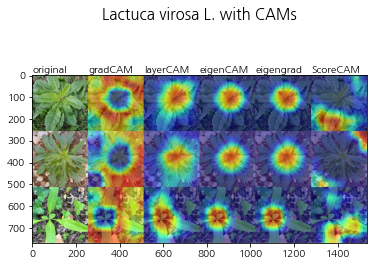

Pelargonium capitatum (L.) L'Hér.
bring path in test data of Pelargonium capitatum (L.) L'Hér.
이미지의 갯수가 입력값보다 적어서 폴더 내 모든 사진을 받아옵니다. 사진 갯수: 1
(1, 256, 256, 3)


100%|█████████████████████████████████████████| 112/112 [00:03<00:00, 32.62it/s]


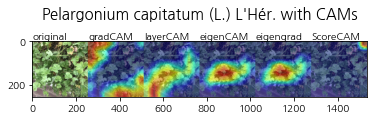

Pelargonium graveolens L'Hér.
bring path in test data of Pelargonium graveolens L'Hér.
(3, 256, 256, 3)


100%|█████████████████████████████████████████| 112/112 [00:03<00:00, 33.39it/s]


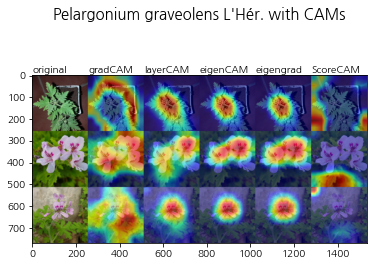

In [14]:
for plant in categories[:3]: #0번 부터 2번까지의 카테고리종의 식물을 가져옵니다
    print(plant)
    label=categories.index(plant)
    test_path=path_inst(plant)
    original_imgs,_=vi.bring_imgs(test_path,3)
    shape=(len(original_imgs),6)
    
    cams_list=vi.printCAM(label,original_imgs,model,[model.patch_embedding]) #scorecam의 업샘플링 연산량으로 인해 출력시간 증가

    vstable=vi.make_table(cams_list,shape) #images 는 이미지들 담겨있는 리스트임
    plt.imshow(vstable)
    plt.title(plant +' with CAMs',y=1.3,fontsize=15)
    
    word=['original','gradCAM','layerCAM','eigenCAM','eigengrad','ScoreCAM']
    for i in range(6):
        plt.text(256*i,-10,word[i])
    
    plt.show()

## 캠의 성능확인 튜토리얼(eigenCAM이 성능이 우수하여 이를 사용하였습니다)
- 특징이 뚜렷한 사진(예를들어 꽃하나가 큼지막하게 있다던지)들은 detection을 꽤나 잘해주고 있음을 확인하였습니다

Lactuca virosa L.
bring path in test data of Lactuca virosa L.


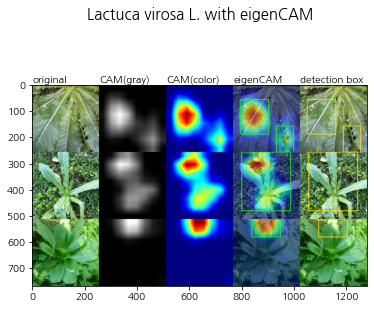

Pelargonium capitatum (L.) L'Hér.
bring path in test data of Pelargonium capitatum (L.) L'Hér.
이미지의 갯수가 입력값보다 적어서 폴더 내 모든 사진을 받아옵니다. 사진 갯수: 1


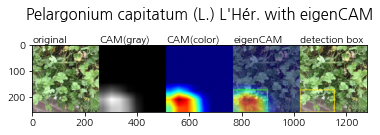

Pelargonium graveolens L'Hér.
bring path in test data of Pelargonium graveolens L'Hér.


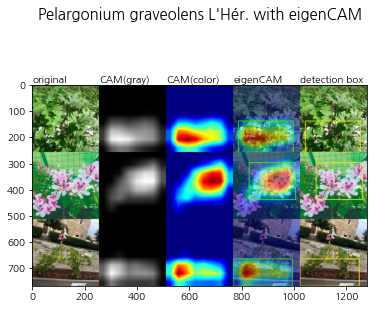

Cirsium arvense (L.) Scop.
bring path in test data of Cirsium arvense (L.) Scop.


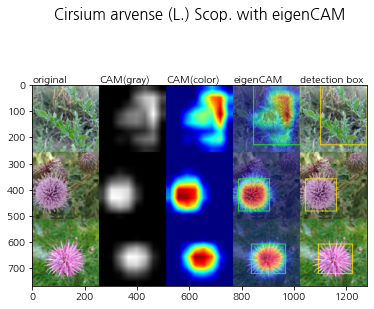

Cirsium vulgare (Savi) Ten.
bring path in test data of Cirsium vulgare (Savi) Ten.


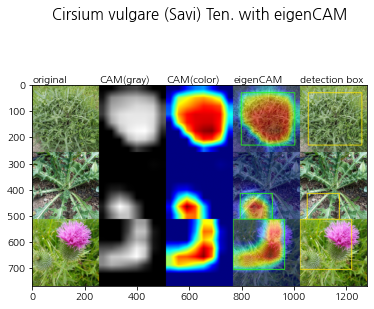

In [18]:
for plant in categories[:5]: #0~4번까지 맨앞 5종의 식물을 가져옵니다.
    
    print(plant)
    label=categories.index(plant)
    test_path=path_inst(plant)
    original_imgs,_=vi.bring_imgs(test_path,3)
    shape=(len(original_imgs),5)
    
    #CAM 이미지를 하나의 리스트로 반환
    cams_list=vi.diverse_CAM(label,original_imgs,model,'eigenCAM',[model.patch_embedding]) 
    
    #리스트내 들어있는 이미지를 테이블형식으로 정렬
    vstable=vi.make_table(cams_list,shape)
    
    plt.imshow(vstable)
    plt.title(plant +' with eigenCAM',y=1.3,fontsize=15)

    word=['original','CAM(gray)','CAM(color)','eigenCAM','detection box']
    for i in range(5):
        plt.text(256*i,-10,word[i])
    plt.show()
    #plt.savefig('withBox'+str(plant_label)+'.png',dpi=256)